IMPORTING IMPORTANT LIBRARIES

In [5]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

IMPORT DATASET & PREPROCESS

In [8]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [9]:
train.shape, test.shape

((12690, 9), (4231, 8))

DATA EXPLORATION

In [10]:
# check for duplicate records... didn't remove the duplicate records as it was bringing score down
train.duplicated().sum(), test.duplicated().sum()
#train.drop_duplicates(keep='first', inplace=True)
#train.reset_index(inplace=True)
#test.drop_duplicates(keep='first', inplace=True)
#test.reset_index(inplace=True)

(25, 1)

In [10]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [11]:
train.info()
#train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [12]:
for i in train.columns:
    print("Unique values in", i, train[i].nunique())

Unique values in TITLE 112
Unique values in RESTAURANT_ID 11892
Unique values in CUISINES 4155
Unique values in TIME 2689
Unique values in CITY 359
Unique values in LOCALITY 1416
Unique values in RATING 32
Unique values in VOTES 1847
Unique values in COST 86


PREPROCESSING

In [12]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [14]:
test.info()
#test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3947 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [15]:
for i in test.columns:
    print("Unique values in", i, test[i].nunique())

Unique values in TITLE 85
Unique values in RESTAURANT_ID 4127
Unique values in CUISINES 1727
Unique values in TIME 1183
Unique values in CITY 151
Unique values in LOCALITY 834
Unique values in RATING 31
Unique values in VOTES 1136


In [17]:
# merge train and test
df = pd.concat([train, test], ignore_index=True)

In [18]:
df = df[['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST']]

In [19]:
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'

df['CLOSED'] = df['TIME'].apply(extract_closed)

In [20]:
df['TIME'] = df['TIME'].str.replace(r'Closed \(.*?\)','')
#df['TIME'] = df['TIME'].str.replace(r'Closed...','')

In [21]:
df['RATING'] = df['RATING'].str.replace('NEW', '1')
df['RATING'] = df['RATING'].str.replace('-', '1').astype(float)

In [22]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)

In [23]:
df['CITY'].fillna('Missing', inplace=True)
df['LOCALITY'].fillna('Missing', inplace=True)
df['RATING'].fillna(3.8, inplace=True)
df['VOTES'].fillna(0.0, inplace=True)

In [13]:
a = np.log(train['COST'])

In [24]:
df.head(2)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA


In [25]:
df['TITLE'].nunique(), df['CUISINES'].nunique()

(122, 5183)

In [26]:
calc_mean = df.groupby(['CITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['CITY','CITY_MEAN_RATING']
df = df.merge(calc_mean, on=['CITY'],how='left')

calc_mean = df.groupby(['LOCALITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['LOCALITY','LOCALITY_MEAN_RATING']
df = df.merge(calc_mean, on=['LOCALITY'],how='left')

In [27]:
df.head(2)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,3.376271,3.388889
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,3.584588,3.472222


In [29]:
# Handle missing values in 'TITLE' column before applying TfidfVectorizer
df['TITLE'].fillna('', inplace=True)  # Replace NaN with empty strings

from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_title = tf1.fit_transform(df['TITLE'])
df_title = pd.DataFrame(data=df_title.toarray(), columns=tf1.get_feature_names_out())
# Use get_feature_names_out() instead of get_feature_names() if your scikit-learn version is 1.0 or above

# ... (rest of your code)

In [31]:
df.head(2)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,3.376271,3.388889
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,3.584588,3.472222


In [16]:
print(train['TITLE'].nunique())
print(train['RESTAURANT_ID'].nunique())
print(train['CUISINES'].nunique())
print(train['TIME'].nunique())
print(train['CITY'].nunique())
print(train['LOCALITY'].nunique())
print(train['RATING'].nunique())
print(train['VOTES'].nunique())

112
11892
4155
2689
359
1416
32
1847


In [38]:
import pandas as pd

# Load training data from a CSV file
train_df = pd.read_excel('/content/Data_Test.xlsx')
test_df = pd.read_excel('/content/Data_Train.xlsx')  # Replace with your test data file path

# Now you can access the shape
train_df.shape, test_df.shape

((4231, 8), (12690, 9))

TRAIN TEST SPLIT

In [41]:
import pandas as pd

# Load training data from a CSV file
train_df = pd.read_excel('/content/Data_Test.xlsx')
test_df = pd.read_excel('/content/Data_Train.xlsx')  # Replace with your test data file path

# Check the column names of your DataFrame
print(train_df.columns) # Print the column names to identify the correct target variable column

# Replace 'RATING' with the actual name of the column you want to drop
X = train_df.drop(labels=['RATING'], axis=1)
y = train_df['RATING'].values # Extract the target variable

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')


In [42]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((3173, 7), (3173,), (1058, 7), (1058,))

DATA VISUALISATION

<Axes: xlabel='RATING'>

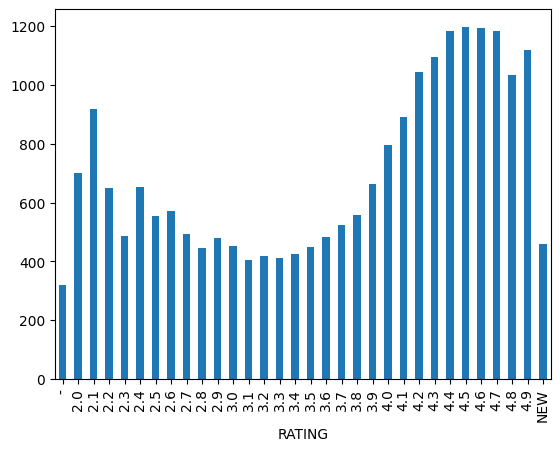

In [17]:
train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

<Axes: xlabel='RATING'>

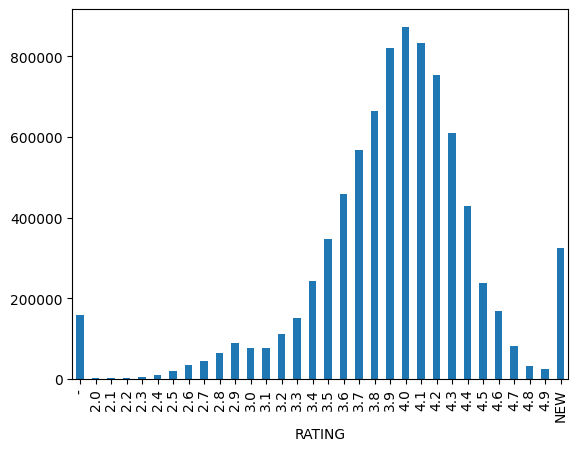

In [18]:
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [19]:
train['CITY'].value_counts()

CITY
Chennai                            2174
Bangalore                          2149
Hyderabad                          1819
Mumbai                             1722
New Delhi                          1321
                                   ... 
Near Santosh Banjara Hyderabad        1
Thane (W)                             1
Vasai West.                           1
Kerala 683104                         1
Bangalore Koramangala 7th Block       1
Name: count, Length: 359, dtype: int64

In [20]:
train[train['CITY'] == 'Mumbai']['COST'].mean()

865.2729384436701

In [21]:
train[train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [22]:
train[train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [23]:
train['RATING'] = train['RATING'].astype('object')
# for test set
test['RATING'] = test['RATING'].astype('object') # replace the rating

In [24]:
train['RATING'] = train['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating
# for test set
test['RATING'] = test['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

In [25]:
train['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [26]:
train['RATING'] = train['RATING'].astype(float) # replace the rating
# for test set
test['RATING'] = test['RATING'].astype(float) # replace the rating

CHECKING THE MSSING VALUES

In [27]:
train.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [28]:
test.isnull().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

JOINING THE DATA

In [29]:
train['source']= 'train'
test['source'] = 'test'

In [30]:
data=pd.concat([train, test],ignore_index=True)

In [31]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [32]:
new1_test = data["VOTES"].str.split(" ", n = 1, expand =True)

In [33]:
data['votes_no'] = new1_test[0]
data['votes'] = new1_test[1]

In [34]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,votes_no,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,24,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,165,votes


In [35]:
data['votes_no'] = data['votes_no'].astype(float)

Fillling Missing Value

In [36]:
data['votes_no'] = data['votes_no'].fillna(44.0) # filling with mode

In [37]:
data['RATING'] = data['RATING'].fillna(3.8) # filling with the median

In [38]:
data['LOCALITY'] = data['LOCALITY'].fillna('Gachibowli')

In [39]:
data['CITY'] = data['CITY'].fillna('Chennai')

Droping Values

In [40]:
data = data.drop(['VOTES', 'votes'], axis=1)

Feature Engineering

In [41]:
data['title_rat'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].mean())
data['title_rat_C'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].count())
data['city_rat'] = data['CITY'].map(data.groupby('CITY')['RATING'].mean())
data['city_rat_C'] = data['CITY'].map(data.groupby('CITY')['RATING'].count())
data['cuisine_rat'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].mean())
data['cuisine_rat_C'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].count())

In [42]:
data['rest_id'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['RATING'].count())
data['rest_id_votes'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['votes_no'].count())

In [43]:
data['title_rat_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['title_rat_C_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['city_rat_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['city_rat_C_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['cuisine_rat_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())
data['cuisine_rat_C_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())

In [44]:
data['rat_vote'] = data['RATING'] * data['votes_no']

Converison Of Data

In [45]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))

# shape
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (16921, 25)


In [46]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,train,49.0,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,train,30.0,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,train,221.0,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,103,6346,5156,340,277,161,4.1,800.0,train,24.0,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,train,165.0,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [47]:
Train = data.loc[data['source']=='train']
Test = data.loc[data['source']=='test']

In [48]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

<ipython-input-48-9eb522817333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop('source',axis=1,inplace=True)
<ipython-input-48-9eb522817333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(['source','COST'],axis=1,inplace=True)


In [49]:
Train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no,title_rat,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,49.0,3.651487,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,30.0,4.098920,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,221.0,3.651487,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,103,6346,5156,340,277,161,4.1,800.0,24.0,3.589670,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,165.0,3.717717,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [50]:
Test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,votes_no,title_rat,title_rat_C,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
12690,34,4085,3878,1417,323,1314,4.3,564.0,3.651487,4910.0,...,2,1,1,17928.8,17928.8,1115.9,1115.9,8.3,8.3,2425.2
12691,103,12680,4879,2548,277,429,4.2,61.0,3.589670,5634.0,...,1,1,1,20224.2,20224.2,9289.8,9289.8,4.2,4.2,256.2
12692,34,1411,4333,614,277,774,3.8,350.0,3.651487,4910.0,...,1,1,1,17928.8,17928.8,9289.8,9289.8,3.8,3.8,1330.0
12693,122,204,631,2955,128,846,3.8,1445.0,NaN,NaN,...,164,1,1,NaN,NaN,423.9,423.9,586.0,586.0,5491.0
12694,103,13453,4891,586,216,570,3.6,23.0,3.589670,5634.0,...,32,1,1,20224.2,20224.2,4194.4,4194.4,100.9,100.9,82.8


In [51]:
X = Train.drop('COST', axis=1)
y = a

BUILDING THE MODEL

In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_log_error

In [47]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# Assuming X_train and X_cv are your DataFrames
# Identify columns with 'object' dtype
object_cols = X_train.select_dtypes(include='object').columns

# Apply label encoding to convert categorical features to numerical
label_encoder = LabelEncoder()
for col in object_cols:
    # Fit the label encoder on the combined unique values from both training and validation sets
    all_unique_values = pd.concat([X_train[col], X_cv[col]]).unique()
    label_encoder.fit(all_unique_values)

    X_train[col] = label_encoder.transform(X_train[col])
    X_cv[col] = label_encoder.transform(X_cv[col])  # Use the same encoder fitted on training data

# Now recreate your LightGBM Datasets with the transformed data
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

# ... (rest of your LightGBM training code)